In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import normal, seed, choice
import matplotlib.pyplot as plt
import statsmodels.api as sm

**Correlation between UFO sightings and Dow-Jones-Index**

In [2]:
DJI = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DJI.csv', parse_dates=['Date'], index_col='Date')
DJI.index = DJI.index.year
DJI

,Value
Date,
1941,110.96
1942,119.40
1943,135.89
1944,152.32
1945,192.91
...,...
2009,10428.05
2010,11577.51
2011,12217.56


In [3]:
UFO = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UFO.csv', parse_dates=['Date'], index_col='Date')
UFO.index = UFO.index.year
UFO

,Value
Date,
1941,1
1942,2
1943,9
1944,9
1945,9
...,...
2009,4541
2010,4283
2011,5107


In [4]:
levels = DJI.merge(UFO, on='Date', suffixes=('_DJI', '_UFO'))
levels

,Value_DJI,Value_UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9
...,...,...
2009,10428.05,4541
2010,11577.51,4283
2011,12217.56,5107


In [5]:
# Compute correlation of levels
correlation1 = levels['Value_DJI'].corr(levels['Value_UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['Value_DJI'].corr(changes['Value_UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


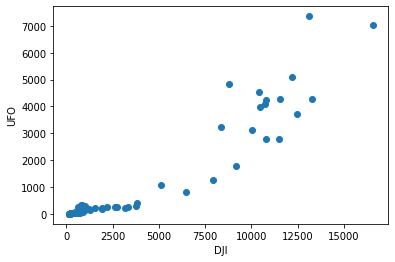

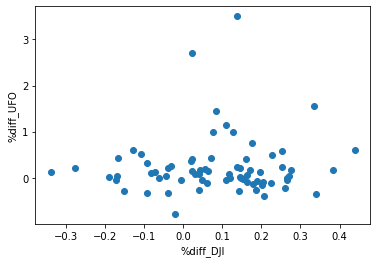

In [6]:
plt.scatter(x=levels['Value_DJI'], y=levels['Value_UFO'])
plt.xlabel('DJI')
plt.ylabel('UFO')
plt.show();

plt.scatter(x=changes['Value_DJI'], y=changes['Value_UFO'])
plt.xlabel('%diff_DJI')
plt.ylabel('%diff_UFO')
plt.show();

In [7]:
# Assume we choose to calculate the regression between the DJI and UFO sightings
# although the percent change shows that no relationship exist between both entities.
result = sm.OLS(DJI.Value, sm.add_constant(UFO)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     538.7
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           7.05e-35
Time:                        20:01:10   Log-Likelihood:                -638.10
No. Observations:                  73   AIC:                             1280.
Df Residuals:                      71   BIC:                             1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.5938    209.072      4.776      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Autocorrelation:**
1. Mean-Reversion i.e. negative autocorrelation.
2. Momentum or Trend Following i.e. positive autocorrelation.

In [8]:
MSFT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSFT.csv', parse_dates=['Date'], index_col='Date')
MSFT

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351
...,...
2017-07-31,72.699997
2017-08-01,72.580002
2017-08-02,72.260002


In [9]:
# Convert the daily data to weekly data
MSFT1 = MSFT.resample('W').last()
print(MSFT1,'\n')

# Compute the percentage change of prices
returns = MSFT1.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

            Adj Close
Date                 
2012-08-12  26.517351
2012-08-19  27.114212
2012-08-26  26.815865
2012-09-02  27.044012
2012-09-09  27.158091
...               ...
2017-07-09  69.459999
2017-07-16  72.779999
2017-07-23  73.790001
2017-07-30  73.040001
2017-08-06  72.680000

[261 rows x 1 columns] 

The autocorrelation of weekly returns is -0.16


In [10]:
# Convert to daily data
MSFT2_daily_rates = MSFT.resample('D').interpolate()

# Compute the daily change in close rates 
MSFT2_daily_diff = MSFT2_daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = MSFT2_daily_diff['Adj Close'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
MSFT2_yearly_rates = MSFT2_daily_rates.resample('A').interpolate()

# Repeat above for annual data
MSFT2_yearly_diff = MSFT2_yearly_rates.diff()
autocorrelation_yearly = MSFT2_yearly_diff['Adj Close'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.03
The autocorrelation of annual interest rate changes is 0.87


**Autocorrelation Function**

In [11]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

In [12]:
HRB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HRB.csv', parse_dates=['Quarter'], index_col='Quarter')
HRB.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


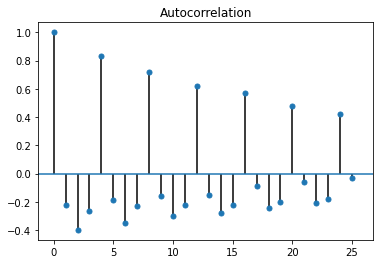

In [13]:
# Compute the acf array of HRB
acf_array = acf(HRB['Earnings'], fft=False)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1, lags=25)
plt.show()

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


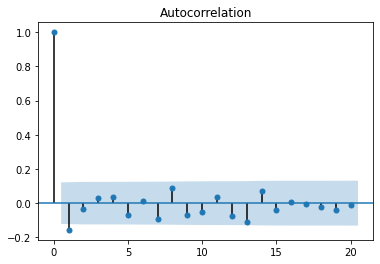

In [14]:
# drop null values in returns
returns = returns.dropna()

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

**White Noise Series:**
- Constant mean.
- Constant variance.
- Zero autocorrelations at all lags.
- Special Case: Data with normal distribution i.e. Gaussian White Noise

The mean is 0.023 and the standard deviation is 0.051


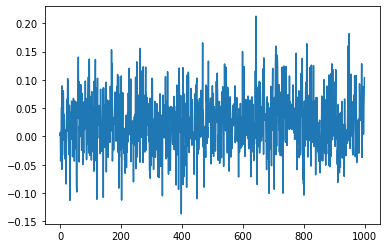

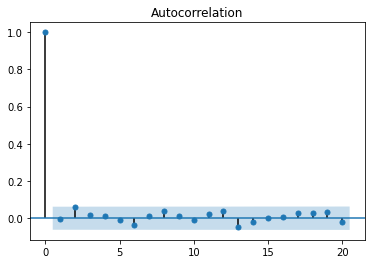

In [15]:
# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

In [16]:
pd.Series(returns).autocorr()

-0.0027680252385799257

**Random Walk**

If stock prices follow a random walk the price returns are white noise.
Random walk cannot be forecasted. However it can have a drift i.e. a 
change in the mean value of the white noise. 

**Dickey-Fuller Test**:
To test for random walk we regress the current value on lag value.
If slope coefficient is not significantly less than one we cannot reject the null hypothesis. if significantly less than one then it is not a random walk. If we regress the difference of current value and lag value against lag value then we compare the slope coefficient to 0 instead of 1.

**Augumented Dickey-Fuller Test**: adding more lagged changes in value.

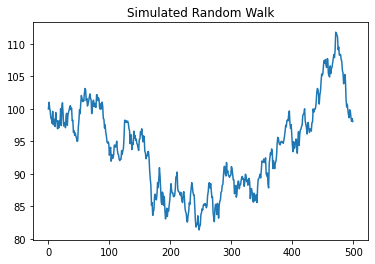

In [17]:
seed(25)

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

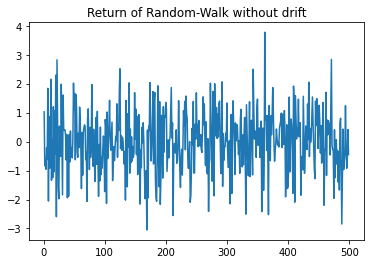

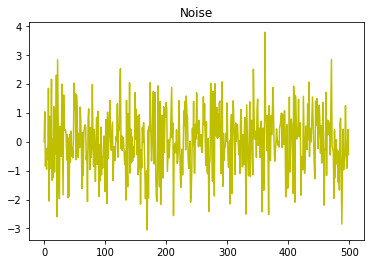

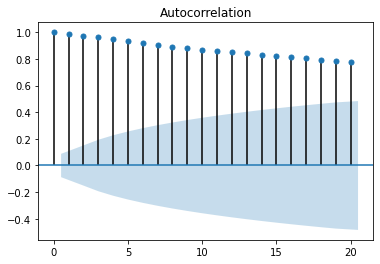

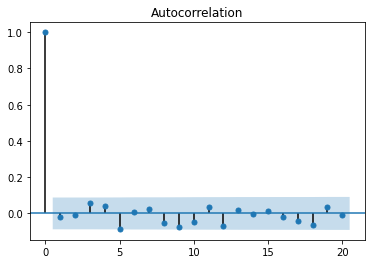

In [18]:
plt.plot(pd.Series(P).diff())
plt.title('Return of Random-Walk without drift')
plt.show();

plt.plot(steps, color='y')
plt.title('Noise')
plt.show();

plot_acf(pd.Series(P), alpha=0.05, lags=20)
plt.show();

plot_acf(pd.Series(P).diff().dropna(), alpha=0.05, lags=20)
plt.show();

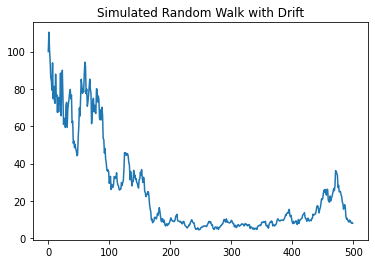

In [19]:
seed(25)

# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.1, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

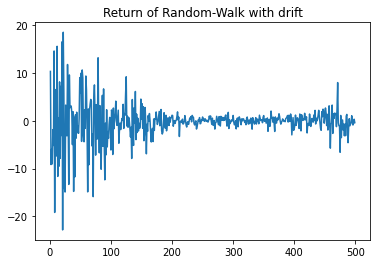

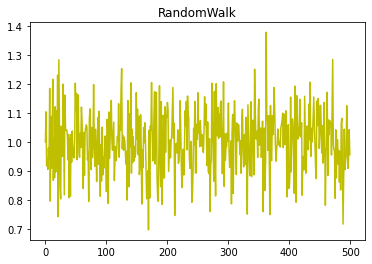

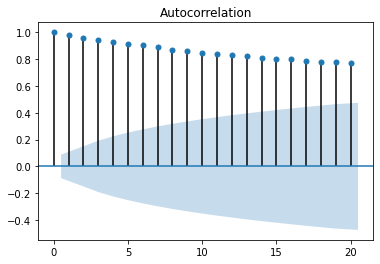

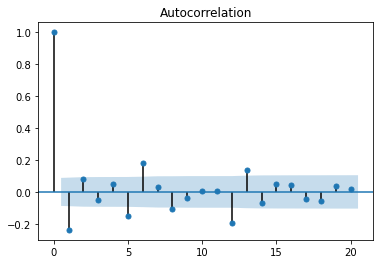

In [20]:
plt.plot(pd.Series(P).diff())
plt.title('Return of Random-Walk with drift')
plt.show();

plt.plot(steps, color='y')
plt.title('RandomWalk')
plt.show();

plot_acf(pd.Series(P), alpha=0.05, lags=20)
plt.show();

plot_acf(pd.Series(P).diff().dropna(), alpha=0.05, lags=20)
plt.show();

In [21]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

In [22]:
AMZN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMZN.csv', parse_dates=['Date'], index_col='Date')
AMZN

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2017-07-27,1046.000000
2017-07-28,1020.039978
2017-07-31,987.780029


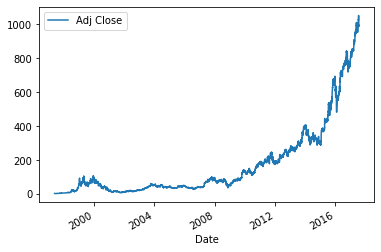

In [23]:
AMZN.plot()
plt.show();

In [24]:
# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.02516852577074, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


In [25]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print(results)
print('The p-value of the test on returns is: ' + str(results[1]))

(-12.053453021869624, 2.565589808349024e-22, 33, 5053, {'1%': -3.431644800138127, '5%': -2.86211216296977, '10%': -2.567074562815631}, -18483.377508750207)
The p-value of the test on returns is: 2.565589808349024e-22


The zeroth element in the adfuller test is the test statistics. more negative means more likely to be stationary.

The second element is the p-value.

The 4th element is the critical test statistics. The values in the dict shows the values the zeroth element needs to be below to be significant.

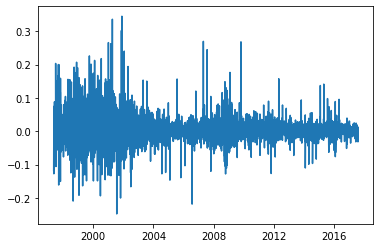

In [26]:
plt.plot(AMZN_ret)
plt.show();

In [27]:
adfuller(steps)

(-22.79710268166664,
 0.0,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 -800.4914654457043)

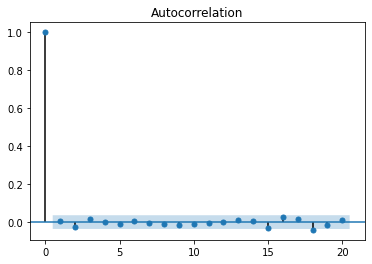

In [28]:
plot_acf(AMZN_ret, alpha=0.01, lags=20)
plt.show();

**Stationarity**
1. Strong Stationarity: Entire distibution is time-invariant.
2. Weak Stationarity i.e. mean, variance and autocorrelation are 
   time-invariant (autocorrelation is only a function of very small time 
   changes).

Stationarity can be obtained by converting the data to another scale or obtaining the first difference

In [29]:
HRB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HRB.csv')#, parse_dates=['Quarter'], index_col='Quarter')
HRB.set_index('Quarter', inplace=True)
HRB.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


         Earnings
Quarter          
2007Q1        NaN
2007Q2        NaN
2007Q3        NaN
2007Q4        NaN
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02


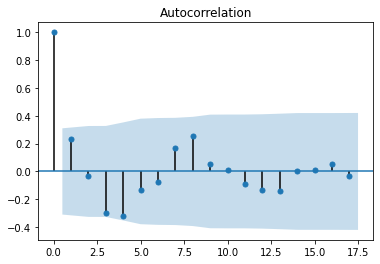

In [30]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(periods=4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

**Autoregressive (AR) Models**

Models where the 
  
  current value = drift_mean + phi*lag value + white noise

  if phi = 1, then it is random walk

  if phi = 0, then it is white noise

Stationary model is obtained when -1 < phi < 1

  if phi = -ve and lag value is positive then Mean Reversion.

  if phi = +ve and lag value is positive then Momentum.

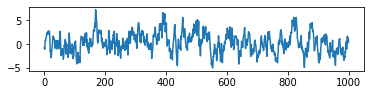

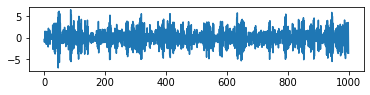

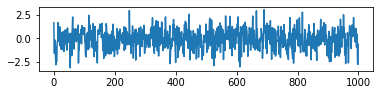

In [31]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(3,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.show();

# Plot 2: AR parameter = -0.9
plt.subplot(3,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show();

# Plot 2: AR parameter = +0.3
plt.subplot(3,1,3)
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show();

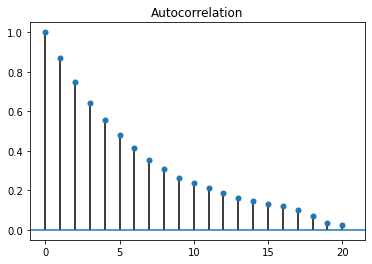

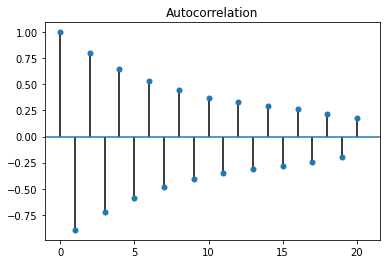

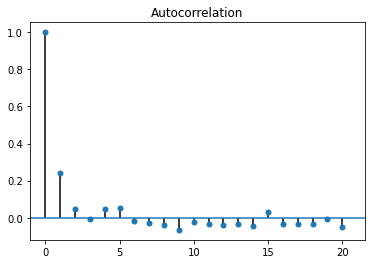

In [32]:
# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

In [33]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0)) # the middle number tells the difference we are to use to make the time series stationary.
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1423.290
Date:                Fri, 21 Oct 2022   AIC                           2852.580
Time:                        20:01:18   BIC                           2867.303
Sample:                             0   HQIC                          2858.176
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3370      0.243      1.385      0.166      -0.140       0.814
ar.L1          0.8696      0.015     57.819      0.000       0.840       0.899
sigma2         1.0073      0.043     23.693      0.0

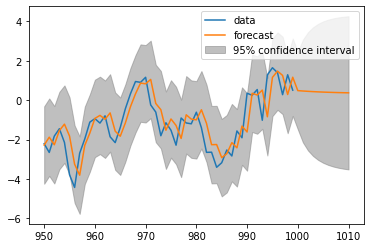

In [34]:
# Import the plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
mod = ARIMA(pd.DataFrame(simulated_data_1), order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
pd.DataFrame({'data': simulated_data_1}).loc[950:].plot(ax=ax)
plot_predict(start=950, end=1010, ax=ax, result=res)
plt.show()

Choosing the right model i.e. order, and fit depends on 2 criteria:

1. The partial autocorrelation function.

2. The information criteria, IC; this adjusts the goodness-of-fit for a number of parameters by imposing a penalty based on the number of parameters used.
2 types of information criteria are; Akaike information criteria, AIC, and the Bayesian information criteria, BIC. The parameter order which gives the lowest IC is chosen.

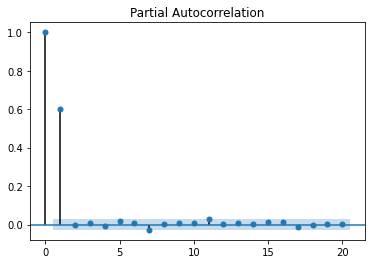

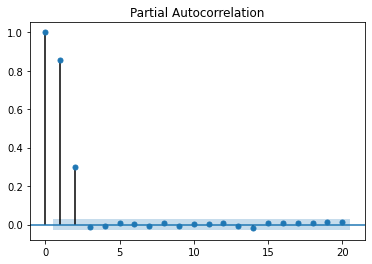

In [35]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

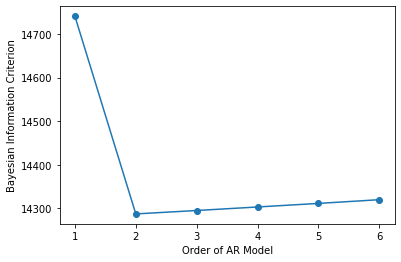

In [36]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

**Moving Average MA Models**

current value = mean + noise + theta*lag noise.

if current value fades at theta = 0, then white noise.

MA models are stationary for all values of theta.

autocorrelation after first lag is not significantly different from zero.

autocorrelation at first lag = theta/(1 + theta**2).

-ve theta: mean reversion.

+ve theta: momentum.

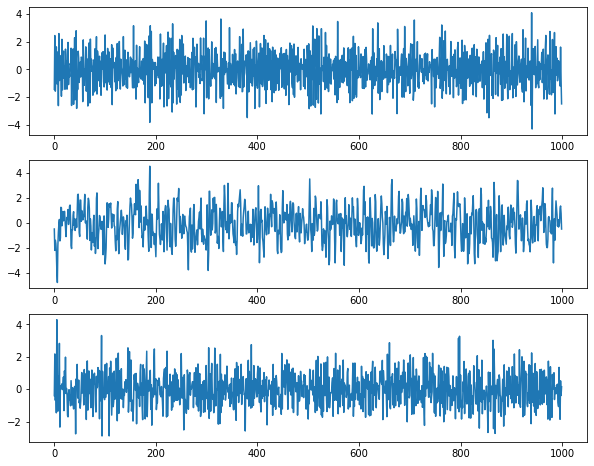

In [37]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 8))
# Plot 1: MA parameter = -0.9
plt.subplot(3,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(3,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

# Plot 3: MA parameter = -0.3
plt.subplot(3,1,3)
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)

plt.show()

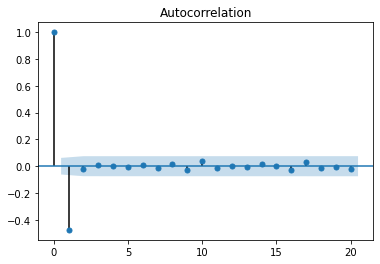

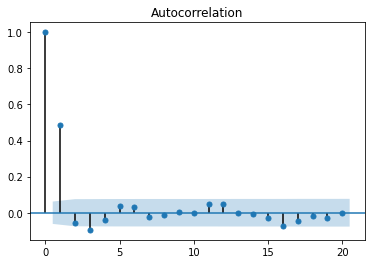

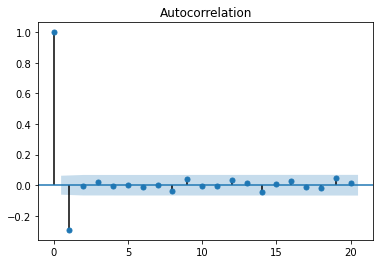

In [38]:
# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show();

# Plot 1: MA parameter = +0.9
plot_acf(simulated_data_2, lags=20)
plt.show();

# Plot 1: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show();

In [39]:
# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[:2])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1433.091
Date:                Fri, 21 Oct 2022   AIC                           2872.183
Time:                        20:01:35   BIC                           2886.906
Sample:                             0   HQIC                          2877.779
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.003      0.765      0.444      -0.003       0.008
ma.L1         -0.9113      0.013    -68.286      0.000      -0.937      -0.885
sigma2         1.0269      0.046     22.220      0.0

In [40]:
type(simulated_data_1)

numpy.ndarray

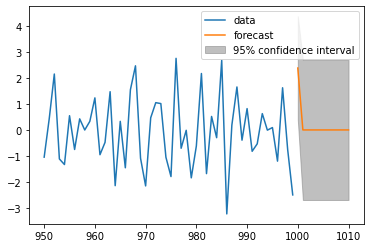

In [41]:
# Forecast the first MA(1) model
mod = ARIMA(pd.DataFrame({'data': simulated_data_1}), order=(0,0,1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
pd.DataFrame({'data': simulated_data_1}).loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

In [42]:
intraday = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sprint_Intraday.txt', header=None, engine='python', sep=',')
intraday = intraday[[0,1]]
intraday

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875
...,...,...
384,386,8.2750
385,387,8.2800
386,388,8.2750
387,389,8.2750


In [43]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes,'\n')

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

intraday

DATE      object
CLOSE    float64
dtype: object 



,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875
...,...
386,8.2750
387,8.2800
388,8.2750


In [44]:
set(range(391)) - set(intraday.index)

{14, 182}

In [45]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')
intraday.head(5)

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


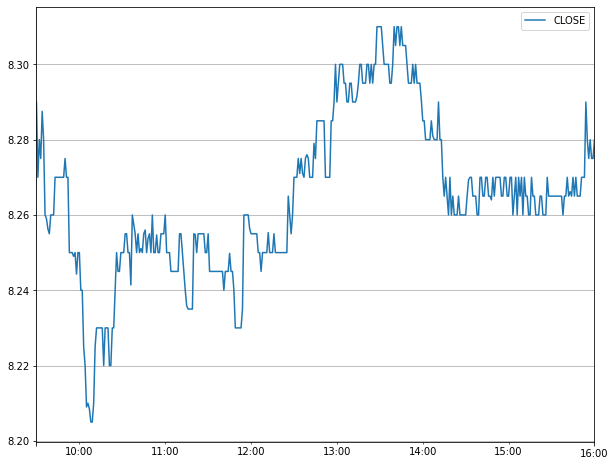

In [46]:
# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True, figsize=(10, 8))
plt.show()

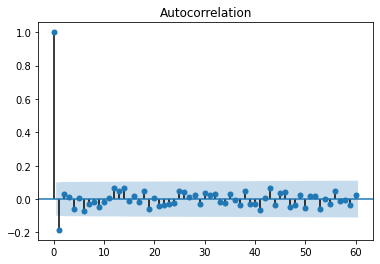

-0.17171619394800597


In [47]:
# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARIMA(returns, order=(0,0,1))
res = mod.fit()
print(res.params[1])

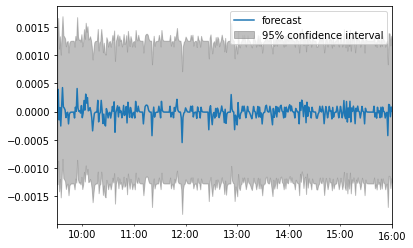

In [48]:
plot_predict(res)
plt.show();

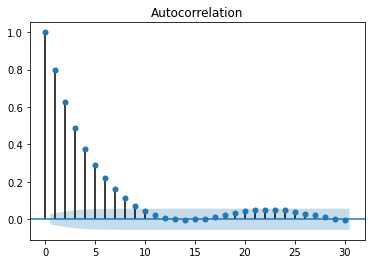

In [49]:
# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

**Cointegration**

2 random walk series which have a linear combination that is not a random walk i.e. it is forecastable. The 2 series are said to be cointegrated.

To test for cointegration, we regress one series to the other, get a slope, and then run an augumented Dickey-Fuller test on the linear combination of the 2 series. This is the algorithm of the 'coint()' module in the statsmodels.tsa.statools package.

In [50]:
HO = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CME_HO1.csv', parse_dates=['Date'], index_col='Date')
HO.sort_values(by='Date', ascending=True, inplace=True)
HO

,Close
Date,
1991-01-02,0.7330
1991-01-03,0.7024
1991-01-04,0.6830
1991-01-07,0.7617
1991-01-08,0.7430
...,...
2005-12-23,1.7053
2005-12-27,1.6370
2005-12-28,1.6825


In [51]:
NG = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CME_NG1.csv', parse_dates=['Date'], index_col='Date')
NG.sort_values(by='Date', ascending=True, inplace=True)
NG

,Close
Date,
1991-01-02,1.832
1991-01-03,1.782
1991-01-04,1.743
1991-01-07,1.785
1991-01-08,1.786
...,...
2005-12-23,12.283
2005-12-27,11.022
2005-12-28,11.431


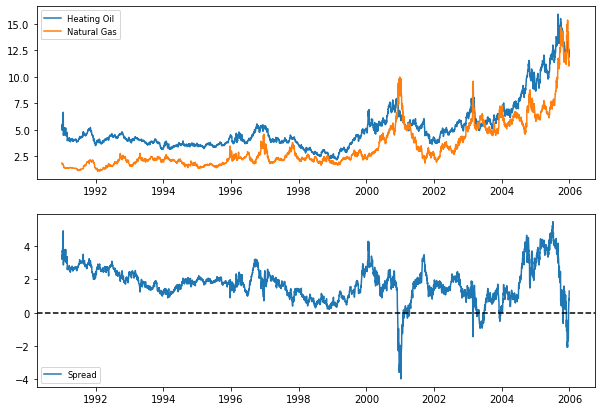

In [52]:
plt.figure(figsize=(10,7))

# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [53]:
# The order of the dataframes or series is very important.

# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO - NG)
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.956710878501786
The p-value for the ADF test on NG is  0.9008747444676731
The p-value for the ADF test on the spread is  7.019439302142247e-05


In [54]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress HO and NG
result = sm.OLS(NG.Close, sm.add_constant(HO)).fit()
b = result.params[1]
print(result.summary(),'\n')

# Evaluate using ADF
adf_stats = adfuller(NG.Close - b*HO.Close)
print("The p-value for the ADF test is ", adf_stats[1])

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                 1.596e+04
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:01:41   Log-Likelihood:                -5323.4
No. Observations:                3754   AIC:                         1.065e+04
Df Residuals:                    3752   BIC:                         1.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1214      0.039    -28.583      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Final Project**

In [55]:
temp_NY = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NOAA_TAVG.csv', index_col=['DATE'])
temp_NY.head()

,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.9
1874,51.3


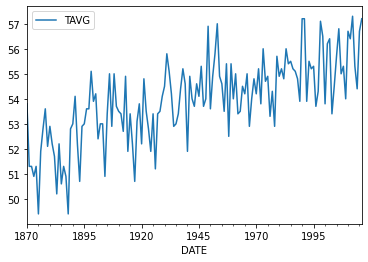

The p-value for the ADF test is  0.5832938987871152


In [56]:
# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

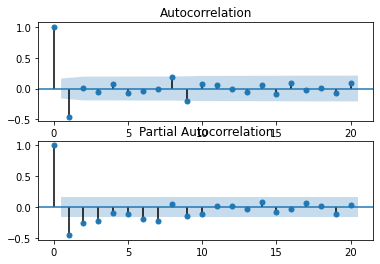

In [57]:
# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])

plt.show();

In [58]:
# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1, 0, 1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local

The AIC for an AR(1) is:  510.53468987331087
The AIC for an AR(2) is:  501.9274123409139
The AIC for an ARMA(1,1) is:  469.07291872075086


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


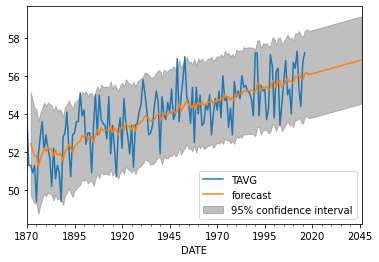

In [59]:
# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, trend='t', order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax = plt.subplots()
temp_NY.plot(ax=ax)
plot_predict(res, start='1872', end='2046', ax=ax)
plt.show()